## Punto 1

La dinámica de un sistema de masa-resorte-amortiguador defninida bajo la fuerza $f(t)$ con desplzamiento $x(t)$, constante de amortiguación $b$, coeficiente de elasticidad $k$ y masa $m$ se define de la siguiente forma:

$$f_\mathrm{resorte}(t)=x(t)\cdot k$$
$$f_\mathrm{amortiguador}(t)=x'(t)\cdot b$$
$$f_\mathrm{masa}(t)=x''(t)\cdot m$$

siendo $x'(t)$ la velocidad y $x''(t)$ la aceleración de la masa, dado que los tres elementos se desplazan sobre un plano solidario. Así la expresión final será:

$$\sum f(t) = x(t)\cdot k + x'(t)\cdot b + x''(t)\cdot m$$

Lo cual será nulo en el caso de que no exista fuerza externa, para este caso:

$$f_\mathrm{externa}(t) = x(t)\cdot k + x'(t)\cdot b + x''(t)\cdot m$$

En el espacio de frecuencia, para condiciones iniciales nulas:

$$F_\mathrm{externa}(s) = X(s)\cdot k + s\cdot X(s)\cdot b + s^2 \cdot X(s)\cdot m$$

Entonces, la función de transferencia:

$$G(s)=\frac{X(s)}{F(s)}=\frac{1}{k+s\cdot b+s^2\cdot m}$$

In [1]:
from numericalunits import N, m as metros, s as segundos, kg
from scipy import signal
from sympy.abc import s
from utils.ctrlsys import expr_to_sys
from IPython.display import display, display_latex

m1 = 0.32*kg
k = 16.29*N/metros
b1 = 0.6596*N*segundos/metros
b2 = 5.5223*N*segundos/metros

segundo_orden = lambda k, b, m, s: 1/(k+s*b+m*s**2)

sys1 = expr_to_sys(segundo_orden(k, b1, m1, s/segundos)/(metros/N), s, freq_space=True)
sys2 = expr_to_sys(segundo_orden(k, b2, m1, s/segundos)/(metros/N), s, freq_space=True)

print(f'Polos del primer sistema: {sys1.to_zpk().poles}')
print(f'Polos del segundo sistema: {sys2.to_zpk().poles}')

Polos del primer sistema: [-1.030625+7.06003273j -1.030625-7.06003273j]
Polos del segundo sistema: [-13.48105499  -3.77613251]


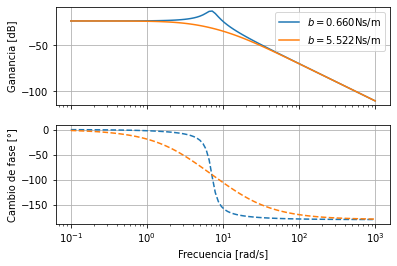

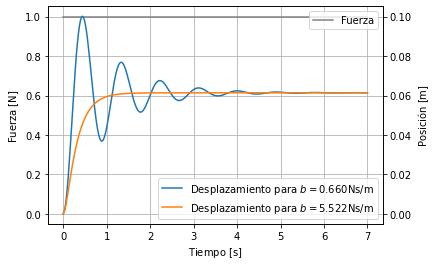

In [11]:
from matplotlib import pyplot as plt
from utils.ctrlsys import add_bode, add_step
import numpy as np

fig, (ax_mag, ax_phase) = plt.subplots(2, sharex=True)
ax_mag.set_ylabel("Ganancia [dB]")
ax_phase.set_ylabel("Cambio de fase [°]")
ax_phase.set_xlabel("Frecuencia [rad/s]")
ax_mag.grid()
ax_phase.grid()
b1_show, b2_show = (f"$b={b/(N*segundos/metros):.3f}\mathrm{{Ns/m}}$" for b in (b1, b2))

w = np.logspace(-1, 3, 100)
add_bode(sys1, ax_mag, ax_phase, label=b1_show, w=w)
add_bode(sys2, ax_mag, ax_phase, label=b2_show, w=w)
ax_mag.legend()

def align_to(ax1, ax2):
    ax1.set_yticks(ax2.get_yticks())
    ax1.set_ylim(ax2.get_ylim())

fig, ax_e = plt.subplots()
ax_r = ax_e.twinx()
ax_r.set_ylabel("Posición [$\\mathrm{m}$]")
ax_e.set_xlabel("Tiempo [$\\mathrm{s}$]")
ax_e.set_ylabel("Fuerza [$\\mathrm{N}$]")

t = np.linspace(0, 7, 300)

ax_e.set_prop_cycle(color=['grey'])
add_step(sys1, ax_r, t=t, o_label=f"Desplazamiento para {b1_show}",
    input_axis=ax_e, i_label="Fuerza")
add_step(sys2, ax_r, t=t, o_label=f"Desplazamiento para {b2_show}")
ax_e.set_ylim(lim*10 for lim in ax_r.get_ylim())
ax_e.grid()
ax_e.legend(loc="upper right")
ax_r.legend(loc="lower right");

### Subpunto E
Con la función de transferencia obtendia anteriormente:
$$G(s)=\frac{X(s)}{F(s)}=\frac{1}{k+s\cdot b+s^2\cdot m}$$
Y las equivalencias listadas en la consigna
$$f(t)=v(t) \land dx/dt = i(t)$$
Se pueden obtener las sigueintes igualdades en el espacio de frecuencia:
$$F(s)=V(s) \land s\cdot X(s) = I(s)$$
Ahora sustituyendo:
$$G(s)=\frac{I(s)}{V(s)}=\frac{s}{k+s\cdot b+s^2\cdot m}$$
Trabajando algebráicamente obtenemos la expresión para la tensión en función de la corriente, por lo que su factor de proporcionalidad deberá ser la impedancia del circuito en serie
$$V(s)=I(s)\left(\frac{k}{s}+b+s\cdot m\right)$$
Transformado al espacio de tiempo tenemos:
$$v(t)=k\int{i(t)} dt +b\cdot i(t)+m\cdot\frac{di}{dt}$$

$k$, la constante de elasticidad del resorte, es similar la capacitancia del capacitor, ya que es proporcional a la carga, o la integral de la corriente en el tiempo.

$b$, el amortiguamiento, es análogo es la resistencia del resistor, ya que es proporcional a la corriente. Coincide en ambos casos que este componente discipa la energía proporcionada al sistema

$m$, la masa, es equivalente a la inductancia del inductor, dada su proporcionalidad con el cambio de la corriente, o la aceleración.
